1-1 인공지능과 가위바위보 하기

In [1]:
#손글씨 분류기 활용.
#데이터 준비->딥러닝 네트워크 설계->학습->테스트(평가)

1-2 데이터를 준비하자!

MNIST 숫자 손글씨 Dataset 불러들이기

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__) # Tensorflow의 버전을 출력
mnist = keras.datasets.mnist
# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다.
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(len(x_train)) # x_train 배열의 크기를 출력

2.3.0
11493376/11490434 [==============================] - 0s 0us/step
60000


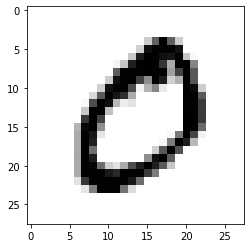


0


In [5]:
plt.imshow(x_train[1],cmap=plt.cm.binary)
plt.show()
print()
print(y_train[1])


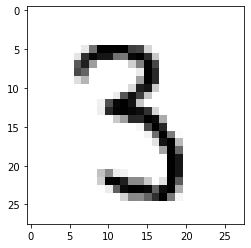

12345 번째 이미지의 숫자는 바로  3 입니다.


In [7]:
# index에 0에서 59999 사이 숫자를 지정해 보세요.
index=12344
plt.imshow(x_train[index],cmap=plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지의 숫자는 바로 ', y_train[index], '입니다.')

In [8]:
#학습용 데이터의 수
print(x_train.shape)
#시험용 데이터의 수
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


데이터 전처리 하기

In [12]:
print('최솟값: ', np.min(x_train), '최댓값: ', np.max(x_train))
#MNIST 데이터는 각 필셀의 값이 0~255 사이 범위에 있으므로
#인공지능 모델을 훈련시키고 사용할 때 입력은 0~1이 좋으므로
#데이터들을 255.0으로 나누어 준다.
x_train_norm, x_test_norm = x_train/255, x_test/255
print('최솟값:', np.min(x_train_norm),'최댓값:', np.max(x_test_norm))

최솟값:  0 최댓값:  255
최솟값: 0.0 최댓값: 1.0


1-3 딥러닝 네트워크 설계\
Sequenential Model을 사용해 보자

In [15]:
#tf.keras의 Sequential API를 이용하여
#LeNet이라는 딥러닝 네트워크를 설계한 예
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
print('Model에 추가된 Layer 개수: ', len(model.layers))
print()
#딥러닝 네트워크 모델 확인
model.summary()

Model에 추가된 Layer 개수:  7

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_5 (Dense)              

1-4 딥러닝 네트워크 학습시키기

In [17]:
#우리가 만든 네트워크의 입력은 (데이터개수, 이미지크기x, 이미지크기y, 채널수)
#와 같은 형태를 가진다. 위에서 첫번째 레이어에 input_shape=(28,28,1)로 지정했는데,
#print(x_train.shape)을 해보면 (60000,28,28)로 채널수에 대한 정보가 없으므로
#(60000,28,28,1)f로 만들어 주어야 한다.
#여기서 채널수 1은 흑백, 컬러라면 R,G,B이므로 3
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))
x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)
# 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


In [18]:
#x_train 학습 데이터로 딥러닝 네트워크 학습시키기
#여기서 epochs=10 은 전체 60.000개의 데이터를 10번 반복 사용해서
#학습 시키라는 뜻이다. model의 입력 정의에 형태를 맞춘 x_train_reshaped 사용
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)
#각 학습이 진행됨에 따라 epoch 별로 어느 정도 인식 정확도가 올라가는지 확인할 수 있다.
#9 epoch정도부터는 인식률 상승이 미미하므로 10 epoch정도가 적당하다.

Epoch 1/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2010 - accuracy: 0.9381
Epoch 2/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0670 - accuracy: 0.9793
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0495 - accuracy: 0.9846
Epoch 4/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0394 - accuracy: 0.9874
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0309 - accuracy: 0.9902
Epoch 6/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0258 - accuracy: 0.9915
Epoch 7/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0209 - accuracy: 0.9934
Epoch 8/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0178 - accuracy: 0.9943
Epoch 9/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0161 - accuracy: 0.9947
Epoch 10/10
1875/1875 [==============================] - 15s 8ms/step - l

1-5 얼마나 잘 만들었는지 확인하기

In [19]:
#시험용 데이터를 가지고 테스트 해보기
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))
#예상보다 낮은 점수(98.45)가 나옴

313/313 - 1s - loss: 0.0543 - accuracy: 0.9845
test_loss: 0.054344385862350464 
test_accuracy: 0.984499990940094


model.predict() 결과 :  [2.6343819e-12 6.4158737e-13 5.6960964e-10 2.6090681e-09 2.6025270e-13
 6.8705832e-13 9.8867998e-19 1.0000000e+00 5.0642897e-14 6.0947664e-11]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


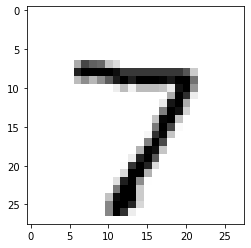

In [21]:
#어떤 데이터가 잘못됐는지 확인해보기
predicted_result = model.predict(x_test_reshaped) # model이 추론한 확률값.
predicted_labels = np.argmax(predicted_result, axis=1)
idx=0 #1번째 x_test를 살펴보자.
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [1.9687722e-10 6.9239810e-08 2.4205759e-12 2.6544740e-07 4.8277277e-01
 6.2991248e-09 8.0643938e-12 5.1632998e-08 4.3829447e-09 5.1722682e-01]
라벨: 4, 예측결과: 9
예측확률분포: [9.0612394e-07 1.9062889e-09 7.1289785e-02 9.1910410e-01 2.5828961e-09
 1.6883414e-08 9.8119824e-07 3.9167108e-07 9.5987311e-03 5.0269241e-06]
라벨: 2, 예측결과: 3
예측확률분포: [1.9000712e-12 6.9751268e-06 1.0681473e-08 9.4895256e-01 5.2756137e-09
 5.1039107e-02 2.3177563e-07 8.8079717e-12 1.0551676e-06 2.5279007e-08]
라벨: 5, 예측결과: 3
예측확률분포: [2.4080262e-07 6.0180746e-02 1.7767269e-02 5.6630035e-04 1.2469864e-06
 5.0585442e-11 3.8916302e-14 9.2146295e-01 5.0468356e-07 2.0616653e-05]
라벨: 2, 예측결과: 7
예측확률분포: [9.9020630e-01 1.6639791e-05 9.0695225e-04 1.3846922e-05 8.8634780e-09
 1.2545073e-09 9.1723450e-06 6.5556141e-03 2.2841191e-03 7.4020527e-06]
라벨: 2, 예측결과: 0


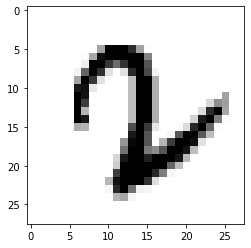

In [24]:
#틀린 경우 확인해보기
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다.
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)
        # wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)
for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()

1-6 더 좋은 네트워크 만들기

In [25]:
#하이퍼 피라미드 바꾸기
#바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=
(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)
# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

1-7 프로젝트: 가위바위보 분류기 만들기

In [17]:
# PIL 라이브러리가 설치되어 있지 않다면 설치
#!pip install pillow
from PIL import Image
import os, glob
import pandas as pd
import numpy as np
print("PIL 라이브러리 import 완료")

PIL 라이브러리 import 완료


In [12]:
#가위 이미지 불러오기
image_dir_path = "./data/rock_scissor_paper/scissor"
print("이미지 디렉토리 경로: ", image_dir_path)

images = glob.glob(image_dir_path + "/*.jpg")

#모든 파일을 28*28 사이즈로 바꾸어 저장
target_size = (28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")
    
print("가위 이미지 resize 완료")

이미지 디렉토리 경로:  ./data/rock_scissor_paper/scissor
가위 이미지 resize 완료


In [13]:
#바위 이미지 불러오기
image_dir_path = "./data/rock_scissor_paper/rock"
print("이미지 디렉토리 경로: ", image_dir_path)

images = glob.glob(image_dir_path + "/*.jpg")

#모든 파일을 28*28 사이즈로 바꾸어 저장
target_size = (28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")
    
print("바위 이미지 resize 완료")

이미지 디렉토리 경로:  ./data/rock_scissor_paper/rock
바위 이미지 resize 완료


In [14]:
#보 이미지 불러오기
image_dir_path = "./data/rock_scissor_paper/paper"
print("이미지 디렉토리 경로: ", image_dir_path)

images = glob.glob(image_dir_path + "/*.jpg")

#모든 파일을 28*28 사이즈로 바꾸어 저장
target_size = (28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")
    
print("보 이미지 resize 완료")

이미지 디렉토리 경로:  ./data/rock_scissor_paper/paper
보 이미지 resize 완료


In [29]:
def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=300 # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)
    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0 # 가위 : 0
        idx=idx+1
    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1 # 바위 : 1
        idx=idx+1
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2 # 보 : 2
        idx=idx+1
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels
image_dir_path = "./data/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0 # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))


학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  0


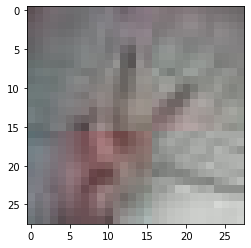

In [30]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])
라벨: 0

1-8 for 문 활용, 한 번에 resize 하는 방법

In [35]:
image_directory = "./data/rock_scissor_paper/paper"
path_pool = "/rock", "/scissor", "/paper"
target_size=(28, 28)
for path in path_pool:
    images=glob.glob(image_directory + path + "/*.jpg")
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size, Image.ANTIALIAS)
    new_img.save(img, "JPEG")
print("리사이징 완료")


리사이징 완료
